In [1]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Đọc file dữ liệu chứng khoán Eximbank và chia tập train test theo tỉ lệ 9:1
df = pd.read_csv('Eximbank.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Chia dữ liệu thành 2 tập train và test
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [3]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Tìm mô hình ARIMA phù hợp nhất bằng auto_arima 
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit mô hình
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17631.159, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17642.063, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17631.298, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17632.400, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17640.196, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17630.696, Time=0.50 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17631.437, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17629.076, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=17630.681, Time=0.35 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=17630.766, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=17627.142, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17630.503, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=17629.396, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=17628.743, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [4]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

In [5]:
# 5. Quá trình tạo index predict 90 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Tạo một mảng gồm 90 số nguyên liên tiếp bắt đầu từ last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Dự đoán giá đóng cho 90 ngày tiếp theo
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# In ra giá đóng đã được dự đoán trong 90 ngày tiếp theo
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[17727.2245693  17711.7209616  17701.1674026  17693.98342259
 17689.09317006 17685.76429528 17683.49827584 17681.95575939
 17680.90574325 17680.19098011 17679.70442917 17679.37322599
 17679.14777058 17678.9942994  17678.88982906 17678.81871439
 17678.77030548 17678.73735274 17678.71492127 17678.6996518
 17678.68925763 17678.68218214 17678.67736574 17678.67408714
 17678.67185535 17678.67033613 17678.66930197 17678.668598
 17678.6681188  17678.66779259 17678.66757054 17678.66741939
 17678.6673165  17678.66724646 17678.66719878 17678.66716632
 17678.66714423 17678.66712919 17678.66711896 17678.66711199
 17678.66710724 17678.66710401 17678.66710182 17678.66710032
 17678.6670993  17678.66709861 17678.66709814 17678.66709781
 17678.6670976  17678.66709745 17678.66709735 17678.66709728
 17678.66709723 17678.6670972  17678.66709718 17678.66709716
 17678.66709715 17678.66709714 17678.66709714 17678.66709714
 17678.66709713 17678.66709713 17678.6670

In [6]:
# 6. Tính độ đo RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Testing RMSE:', test_rmse)

Testing RMSE: 997.8300868915496


In [7]:
# 7. Đánh giá độ chính xác thuật toán bằng MAPE
test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))*100
print('Testing MAPE:', test_mape)

Testing MAPE: 4.382316784135359


In [8]:
# 8. Đánh giá độ chính xác thuật toán bằng MAE
test_mae = np.mean(abs(y_pred - y_test))
print('Testing MAE:', test_mae)

Testing MAE: 823.8412509057047


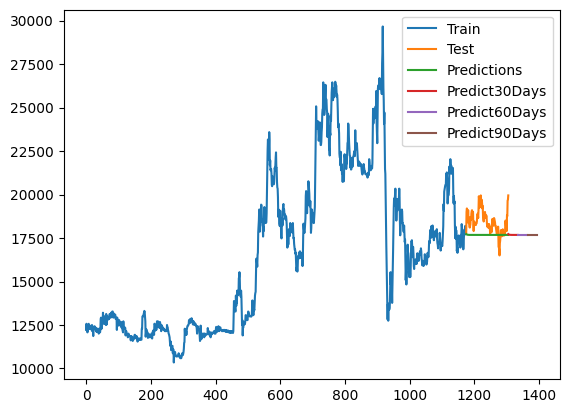

In [9]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Train', 'Test', 'Predictions','Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()

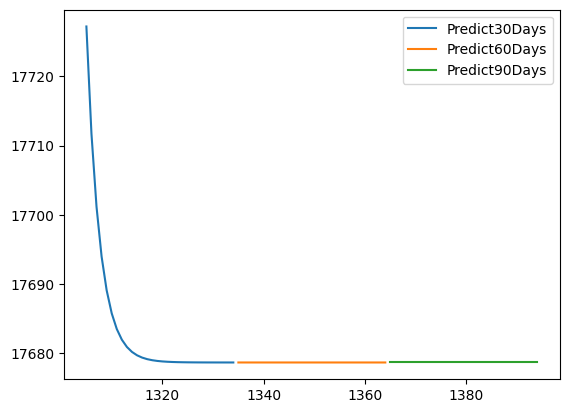

In [10]:
plt.plot(last_data[0:30],y_next_90_days[0:30])
plt.plot(last_data[30:60],y_next_90_days[30:60])
plt.plot(last_data[60:90],y_next_90_days[60:90])
plt.legend(['Predict30Days', 'Predict60Days', 'Predict90Days'])
plt.show()